# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme() 
%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

In [4]:
sinasc_raw.shape

(27028, 69)

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [7]:
faixas_lat = pd.cut(sinasc_raw['munResLat'], [-90, -10.5, 90])
faixas_lat

0        (-90.0, -10.5]
1        (-90.0, -10.5]
2        (-90.0, -10.5]
3        (-90.0, -10.5]
4        (-90.0, -10.5]
              ...      
27023    (-90.0, -10.5]
27024    (-90.0, -10.5]
27025    (-90.0, -10.5]
27026    (-90.0, -10.5]
27027    (-90.0, -10.5]
Name: munResLat, Length: 27028, dtype: category
Categories (2, interval[float64, right]): [(-90.0, -10.5] < (-10.5, 90.0]]

In [8]:
faixas_lat.value_counts()

(-10.5, 90.0]     14034
(-90.0, -10.5]    12993
Name: munResLat, dtype: int64

In [9]:
sinasc_raw.groupby([faixas_lat])[['CONSULTAS','SEMAGESTAC','PESO']].agg([sum,min,'mean',max,'std','var',])

CONSULTAS                                       SEMAGESTAC  \
                     sum min      mean max       std       var        sum   
munResLat                                                                   
(-90.0, -10.5]     48000   1  3.694297   9  0.643372  0.413928   482665.0   
(-10.5, 90.0]      48662   1  3.467436   9  0.888240  0.788970   511951.0   

                                                               PESO       \
                 min       mean   max       std       var       sum  min   
munResLat                                                                  
(-90.0, -10.5]  19.0  38.545360  45.0  2.012435  4.049895  42098594  258   
(-10.5, 90.0]   21.0  38.588302  45.0  2.020722  4.083319  45555148  295   

                                                              
                       mean   max         std            var  
munResLat                                                     
(-90.0, -10.5]  3240.098053  5985  531.815114  282827.315354  
(-10.5, 90.0]   3246.055864  5190  556.487709  309678.570242

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [10]:
sinasc_raw['munResArea'].max() #para ter uma ideia do limite máximo da faixa a ser criada

34096.394

In [137]:
faixas_area = pd.cut(sinasc_raw['munResArea'], [0,3000,99999],right=False)
faixas_area
sinasc_raw.groupby([faixas_area])[['QTDFILVIVO','QTDFILMORT']].agg([sum,min,'mean','median',max,'std','var',])

QTDFILVIVO                                                  \
                     sum  min      mean median   max       std       var   
munResArea                                                                 
[0, 3000)         4773.0  0.0  0.924284    1.0  30.0  1.075442  1.156575   
[3000, 99999)    22053.0  0.0  1.086890    1.0  14.0  1.191750  1.420268   

              QTDFILMORT                                                  
                     sum  min      mean median   max       std       var  
munResArea                                                                
[0, 3000)         1260.0  0.0  0.244803    0.0   4.0  0.551215  0.303838  
[3000, 99999)     5383.0  0.0  0.272116    0.0  28.0  0.629081  0.395743

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [139]:
faixas_alt = pd.cut(sinasc_raw['munResAlt'], 4,right=False)
faixas_alt.value_counts()

[85.0, 212.5)      21269
[212.5, 340.0)      3638
[467.5, 595.51)     1590
[340.0, 467.5)       530
Name: munResAlt, dtype: int64

In [140]:
sinasc_raw.groupby([faixas_alt])[['QTDGESTANT','QTDPARTNOR','QTDPARTCES']].agg([sum,min,'mean','median', max,'std','var',])

QTDGESTANT                                                  \
                       sum  min      mean median   max       std       var   
munResAlt                                                                    
[85.0, 212.5)      26397.0  0.0  1.313414    1.0  52.0  1.448367  2.097766   
[212.5, 340.0)      4106.0  0.0  1.137081    1.0  12.0  1.230177  1.513337   
[340.0, 467.5)       600.0  0.0  1.151631    1.0   9.0  1.271750  1.617348   
[467.5, 595.51)     1813.0  0.0  1.143849    1.0   9.0  1.213664  1.472981   

                QTDPARTNOR                 ...                            \
                       sum  min      mean  ...   max       std       var   
munResAlt                                  ...                             
[85.0, 212.5)      12544.0  0.0  0.645367  ...  41.0  1.254638  1.574116   
[212.5, 340.0)      1305.0  0.0  0.361897  ...  40.0  1.083827  1.174681   
[340.0, 467.5)       200.0  0.0  0.384615  ...   8.0  0.923966  0.853713   
[467.5, 595.51)      522.0  0.0  0.329338  ...   9.0  0.840907  0.707125   

                QTDPARTCES                                                  
                       sum  min      mean median   max       std       var  
munResAlt                                                                   
[85.0, 212.5)       9633.0  0.0  0.493342    0.0  12.0  0.741340  0.549584  
[212.5, 340.0)      2268.0  0.0  0.629126    0.0   5.0  0.755142  0.570239  
[340.0, 467.5)       297.0  0.0  0.571154    0.0   4.0  0.764541  0.584523  
[467.5, 595.51)      938.0  0.0  0.591798    0.0   4.0  0.754152  0.568746  

[4 rows x 21 columns]

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [14]:
sinasc2=sinasc_raw.set_index('munResNome')
sinasc2.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,PARIDADE,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResUf,munResLat,munResLon,munResAlt,munResArea
munResNome,,,,,,,,,,,,,,,,,,,,,
Alta Floresta D'Oeste,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,0,5,1,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025
Alta Floresta D'Oeste,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,1,5,2,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025
Alta Floresta D'Oeste,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,1,5,3,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025
Alto Alegre dos Parecis,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,0,4,4,ATIVO,MUNIC,Rondônia,-12.13178,-61.85308,397.0,3958.273
Alta Floresta D'Oeste,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,1,5,5,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [16]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Ariquemes": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [19]:
grupo_data_reg_ime= sinasc2.groupby([imediatas,'DTNASC'])
df=grupo_data_reg_ime.IDADEMAE.mean().to_frame()
df

IDADEMAE
munResNome DTNASC               
Ariquemes  2019-01-01  23.200000
           2019-01-02  26.166667
           2019-01-03  24.142857
           2019-01-04  24.666667
           2019-01-05  22.888889
...                          ...
Vilhena    2019-12-27  27.000000
           2019-12-28  22.666667
           2019-12-29  24.250000
           2019-12-30  26.600000
           2019-12-31  23.857143

[2181 rows x 1 columns]

In [78]:
df.index.levels[0]

Index(['Ariquemes', 'Cacoal', 'Jaru', 'Ji-Paraná', 'Porto Velho', 'Vilhena'], dtype='object', name='munResNome')

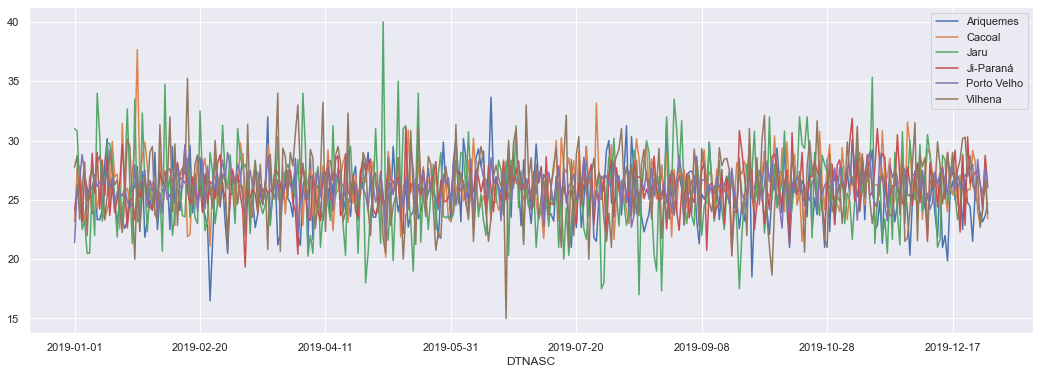

In [71]:
for imediata in lista_imediatas:
    df.loc[imediata]['IDADEMAE'].plot(figsize=[18, 6])
    plt.legend(lista_imediatas)

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [74]:
sinasc2.head(3)

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,PARIDADE,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResUf,munResLat,munResLon,munResAlt,munResArea
munResNome,,,,,,,,,,,,,,,,,,,,,
Alta Floresta D'Oeste,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,0,5,1,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025
Alta Floresta D'Oeste,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,1,5,2,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025
Alta Floresta D'Oeste,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,1,5,3,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [145]:
mapping = {
    "Candeias do Jamari": "2.IDH-M Médio",
    "Guajará-Mirim": "2.IDH-M Médio",
    "Itapuã do Oeste": "2.IDH-M Médio",
    "Nova Mamoré": "3.IDH-M Baixo",
    "Porto Velho": "1.IDH-M Alto",
    "Ariquemes": "1.IDH-M Alto",
    "Alto Paraíso": "2.IDH-M Médio",
    "Ariquemes": "2.IDH-M Médio",
    "Buritis": "2.IDH-M Médio",
    "Cacaulândia": "2.IDH-M Médio",
    "Campo Novo de Rondônia": "3.IDH-M Baixo",
    "Cujubim": "2.IDH-M Médio",
    "Monte Negro": "2.IDH-M Médio",
    "Rio Crespo": "2.IDH-M Médio",
    "Jaru": "2.IDH-M Médio",
    "Governador Jorge Teixeira": "3.IDH-M Baixo",
    "Machadinho D'Oeste": "3.IDH-M Baixo",
    "Theobroma": "3.IDH-M Baixo",
    "Vale do Anari": "3.IDH-M Baixo",
    "Alvorada D'Oeste": "2.IDH-M Médio",
    "Costa Marques": "2.IDH-M Médio",
    "Ji-Paraná": "1.IDH-M Alto",
    "Mirante da Serra": "2.IDH-M Médio",
    "Nova União": "3.IDH-M Baixo",
    "Ouro Preto do Oeste": "2.IDH-M Médio",
    "Presidente Médici": "2.IDH-M Médio",
    "São Francisco do Guaporé": "2.IDH-M Médio",
    "São Miguel do Guaporé": "2.IDH-M Médio",
    "Seringueiras": "3.IDH-M Baixo",
    "Teixeirópolis": "2.IDH-M Médio",
    "Urupá": "2.IDH-M Médio",
    "Vale do Paraíso": "2.IDH-M Médio",
    "Cacoal": "1.IDH-M Alto",
    "Alta Floresta D'Oeste": "2.IDH-M Médio",
    "Alto Alegre dos Parecis": "3.IDH-M Baixo",
    "Castanheiras": "2.IDH-M Médio",
    "Espigão D'Oeste": "2.IDH-M Médio",
    "Ministro Andreazza": "2.IDH-M Médio",
    "Nova Brasilândia D'Oeste": "2.IDH-M Médio",
    "Novo Horizonte do Oeste": "2.IDH-M Médio",
    "Parecis": "2.IDH-M Médio",
    "Pimenta Bueno": "1.IDH-M Alto",
    "Primavera de Rondônia": "2.IDH-M Médio",
    "Rolim de Moura": "1.IDH-M Alto",
    "Santa Luzia D'Oeste": "2.IDH-M Médio",
    "São Felipe D'Oeste": "2.IDH-M Médio",
    "Vilhena": "1.IDH-M Alto",
    "Cabixi": "2.IDH-M Médio",
    "Cerejeiras": "2.IDH-M Médio",
    "Chupinguaia": "2.IDH-M Médio",
    "Colorado do Oeste": "2.IDH-M Médio",
    "Corumbiara": "2.IDH-M Médio",
    "Pimenteiras do Oeste": "2.IDH-M Médio"
}
    

In [146]:
sinasc2.groupby(mapping)[['IDADEMAE']].count()

,IDADEMAE
munResNome,
1.IDH-M Alto,15126
2.IDH-M Médio,10075
3.IDH-M Baixo,1826


In [147]:
sinasc2.groupby(mapping)[['IDADEMAE']].agg([min,'mean','median', max])

IDADEMAE                      
                   min       mean median max
munResNome                                  
1.IDH-M Alto        12  26.357200   26.0  47
2.IDH-M Médio       11  25.837320   25.0  53
3.IDH-M Baixo       13  25.326944   25.0  46

In [148]:
sinasc2.groupby(mapping)[['CONSULTAS','SEMAGESTAC','PESO']].agg([min,'mean','median',max])

CONSULTAS                      SEMAGESTAC                   \
                    min      mean median max        min      mean median   
munResNome                                                                 
1.IDH-M Alto          1  3.510313    4.0   9       19.0  38.57160   39.0   
2.IDH-M Médio         1  3.664119    4.0   9       21.0  38.56278   39.0   
3.IDH-M Baixo         1  3.641292    4.0   9       19.0  38.56018   39.0   

                    PESO                             
                max  min         mean  median   max  
munResNome                                           
1.IDH-M Alto   45.0  292  3244.967804  3275.0  5720  
2.IDH-M Médio  45.0  258  3242.652109  3270.0  5985  
3.IDH-M Baixo  44.0  500  3231.456188  3252.5  5065

In [149]:
sinasc2.groupby(mapping)[['QTDGESTANT','QTDPARTNOR','QTDPARTCES','QTDFILVIVO','QTDFILMORT']].agg([min,'mean','median',max])

QTDGESTANT                        QTDPARTNOR                   \
                     min      mean median   max        min      mean median   
munResNome                                                                    
1.IDH-M Alto         0.0  1.293688    1.0  14.0        0.0  0.592211    0.0   
2.IDH-M Médio        0.0  1.253025    1.0  52.0        0.0  0.546185    0.0   
3.IDH-M Baixo        0.0  1.250695    1.0  11.0        0.0  0.662162    0.0   

                    QTDPARTCES                        QTDFILVIVO            \
                max        min      mean median   max        min      mean   
munResNome                                                                   
1.IDH-M Alto   40.0        0.0  0.494944    0.0  12.0        0.0  1.042797   
2.IDH-M Médio  40.0        0.0  0.562797    0.0   5.0        0.0  1.066482   
3.IDH-M Baixo  41.0        0.0  0.488979    0.0   3.0        0.0  1.072664   

                           QTDFILMORT                         
              median   max        min      mean median   max  
munResNome                                                    
1.IDH-M Alto     1.0  12.0        0.0  0.275910    0.0  28.0  
2.IDH-M Médio    1.0  30.0        0.0  0.255926    0.0   7.0  
3.IDH-M Baixo    1.0  10.0        0.0  0.249406    0.0   9.0

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [150]:
mapping2 = {
    "Candeias do Jamari": "IFDM Moderado",
    "Guajará-Mirim": "IFDM Regular",
    "Itapuã do Oeste": "IFDM Regular",
    "Nova Mamoré": "IFDM Regular",
    "Porto Velho": "IFDM Moderado",
    "Ariquemes": "IFDM Regular",
    "Alto Paraíso": "IFDM Regular",
    "Ariquemes": "IFDM Moderado",
    "Buritis": "IFDM Moderado",
    "Cacaulândia": "IFDM Regular",
    "Campo Novo de Rondônia": "IFDM Regular",
    "Cujubim": "IFDM Regular",
    "Monte Negro": "IFDM Moderado",
    "Rio Crespo": "IFDM Moderado",
    "Jaru": "IFDM Moderado",
    "Governador Jorge Teixeira": "IFDM Regular",
    "Machadinho D'Oeste": "IFDM Regular",
    "Theobroma": "IFDM Regular",
    "Vale do Anari": "IFDM Regular",
    "Alvorada D'Oeste": "IFDM Regular",
    "Costa Marques": "IFDM Regular",
    "Ji-Paraná": "IFDM Moderado",
    "Mirante da Serra": "IFDM Regular",
    "Nova União": "IFDM Regular",
    "Ouro Preto do Oeste": "IFDM Moderado",
    "Presidente Médici": "IFDM Moderado",
    "São Francisco do Guaporé": "IFDM Moderado",
    "São Miguel do Guaporé": "IFDM Moderado",
    "Seringueiras": "IFDM Regular",
    "Teixeirópolis": "IFDM Moderado",
    "Urupá": "IFDM Moderado",
    "Vale do Paraíso": "IFDM Regular",
    "Cacoal": "IFDM Moderado",
    "Alta Floresta D'Oeste": "IFDM Moderado",
    "Alto Alegre dos Parecis": "IFDM Regular",
    "Castanheiras": "IFDM Regular",
    "Espigão D'Oeste": "IFDM Regular",
    "Ministro Andreazza": "IFDM Regular",
    "Nova Brasilândia D'Oeste": "IFDM Regular",
    "Novo Horizonte do Oeste": "IFDM Regular",
    "Parecis": "IFDM Regular",
    "Pimenta Bueno": "IFDM Moderado",
    "Primavera de Rondônia": "IFDM Moderado",
    "Rolim de Moura": "IFDM Moderado",
    "Santa Luzia D'Oeste": "IFDM Moderado",
    "São Felipe D'Oeste": "IFDM Moderado",
    "Vilhena": "IFDM Moderado",
    "Cabixi": "IFDM Regular",
    "Cerejeiras": "IFDM Moderado",
    "Chupinguaia": "IFDM Moderado",
    "Colorado do Oeste": "IFDM Moderado",
    "Corumbiara": "IFDM Regular",
    "Pimenteiras do Oeste": "IFDM Moderado"
}
    

In [151]:
sinasc2.groupby(mapping2)[['IDADEMAE']].count()

,IDADEMAE
munResNome,
IFDM Moderado,21946
IFDM Regular,5081


In [152]:
sinasc2.groupby(mapping2)[['IDADEMAE']].agg([min,'mean','median',max])

IDADEMAE                      
                   min       mean median max
munResNome                                  
IFDM Moderado       12  26.223139   26.0  53
IFDM Regular        11  25.535131   25.0  52

In [153]:
sinasc2.groupby(mapping2)[['CONSULTAS','SEMAGESTAC','PESO']].agg([min,'mean',max])

CONSULTAS               SEMAGESTAC                  PESO  \
                    min      mean max        min       mean   max  min   
munResNome                                                               
IFDM Moderado         1  3.574820   9       19.0  38.574148  45.0  258   
IFDM Regular          1  3.583743   9       19.0  38.538792  45.0  425   

                                  
                      mean   max  
munResNome                        
IFDM Moderado  3243.420532  5720  
IFDM Regular   3242.203306  5985

In [154]:
sinasc2.groupby(mapping2)[['QTDGESTANT','QTDPARTNOR','QTDPARTCES','QTDFILVIVO','QTDFILMORT']].agg([min,'mean',max])

QTDGESTANT                 QTDPARTNOR                  \
                     min      mean   max        min      mean   max   
munResNome                                                            
IFDM Moderado        0.0  1.256705  14.0        0.0  0.553020  40.0   
IFDM Regular         0.0  1.351368  52.0        0.0  0.688431  41.0   

              QTDPARTCES                 QTDFILVIVO                  \
                     min      mean   max        min      mean   max   
munResNome                                                            
IFDM Moderado        0.0  0.517966  12.0        0.0  1.027298  30.0   
IFDM Regular         0.0  0.531098   4.0        0.0  1.164372  14.0   

              QTDFILMORT                  
                     min      mean   max  
munResNome                                
IFDM Moderado        0.0  0.270330  28.0  
IFDM Regular         0.0  0.250616   9.0

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [127]:
mapping3 = {
    "Candeias do Jamari": "2. Acima de 500 Milhões",
    "Guajará-Mirim": "2. Acima de 500 Milhões",
    "Itapuã do Oeste": "5. Acima de 100 Milhões",
    "Nova Mamoré": "2. Acima de 500 Milhões",
    "Porto Velho": "1. Acima de 1 Bilhão",
    "Ariquemes": "1. Acima de 1 Bilhão",
    "Alto Paraíso": "3. Acima de 300 Milhões",
    "Ariquemes": "1. Acima de 1 Bilhão",
    "Buritis": "2. Acima de 500 Milhões",
    "Cacaulândia": "5. Acima de 100 Milhões",
    "Campo Novo de Rondônia": "4. Acima de 200 Milhões",
    "Cujubim": "3. Acima de 300 Milhões",
    "Monte Negro": "4. Acima de 200 Milhões",
    "Rio Crespo": "6. Até 100 Milhões",
    "Jaru": "1. Acima de 1 Bilhão",
    "Governador Jorge Teixeira": "5. Acima de 100 Milhões",
    "Machadinho D'Oeste": "2. Acima de 500 Milhões",
    "Theobroma": "5. Acima de 100 Milhões",
    "Vale do Anari": "5. Acima de 100 Milhões",
    "Alvorada D'Oeste": "4. Acima de 200 Milhões",
    "Costa Marques": "5. Acima de 100 Milhões",
    "Ji-Paraná": "1. Acima de 1 Bilhão",
    "Mirante da Serra": "5. Acima de 100 Milhões",
    "Nova União": "6. Até 100 Milhões",
    "Ouro Preto do Oeste": "2. Acima de 500 Milhões",
    "Presidente Médici": "3. Acima de 300 Milhões",
    "São Francisco do Guaporé": "3. Acima de 300 Milhões",
    "São Miguel do Guaporé": "2. Acima de 500 Milhões",
    "Seringueiras": "5. Acima de 100 Milhões",
    "Teixeirópolis": "6. Até 100 Milhões",
    "Urupá": "5. Acima de 100 Milhões",
    "Vale do Paraíso": "5. Acima de 100 Milhões",
    "Cacoal": "1. Acima de 1 Bilhão",
    "Alta Floresta D'Oeste": "3. Acima de 300 Milhões",
    "Alto Alegre dos Parecis": "4. Acima de 200 Milhões",
    "Castanheiras": "6. Até 100 Milhões",
    "Espigão D'Oeste": "2. Acima de 500 Milhões",
    "Ministro Andreazza": "5. Acima de 100 Milhões",
    "Nova Brasilândia D'Oeste": "3. Acima de 300 Milhões",
    "Novo Horizonte do Oeste": "5. Acima de 100 Milhões",
    "Parecis": "6. Até 100 Milhões",
    "Pimenta Bueno": "1. Acima de 1 Bilhão",
    "Primavera de Rondônia": "6. Até 100 Milhões",
    "Rolim de Moura": "1. Acima de 1 Bilhão",
    "Santa Luzia D'Oeste": "5. Acima de 100 Milhões",
    "São Felipe D'Oeste": "6. Até 100 Milhões",
    "Vilhena": "1. Acima de 1 Bilhão",
    "Cabixi": "5. Acima de 100 Milhões",
    "Cerejeiras": "2. Acima de 500 Milhões",
    "Chupinguaia": "5. Acima de 100 Milhões",
    "Colorado do Oeste": "3. Acima de 300 Milhões",
    "Corumbiara": "5. Acima de 100 Milhões",
    "Pimenteiras do Oeste": "6. Até 100 Milhões"
}
  

In [128]:
sinasc2.groupby(mapping3)[['IDADEMAE']].count()

,IDADEMAE
munResNome,
1. Acima de 1 Bilhão,17736
2. Acima de 500 Milhões,4304
3. Acima de 300 Milhões,1880
4. Acima de 200 Milhões,724
5. Acima de 100 Milhões,1952
6. Até 100 Milhões,431


In [136]:
d.loc['1. Acima de 1 Bilhão']['IDADEMAE'] /d.IDADEMAE.sum()

0.6562326562326563

In [122]:
sinasc2.groupby(mapping3)[['IDADEMAE']].agg([min,'mean',max])

IDADEMAE               
                              min       mean max
munResNome                                      
1. Acima de 1 Bilhão           12  26.265562  47
2. Acima de 500 Milhões        13  25.782528  53
3. Acima de 300 Milhões        11  25.998806  53
3. Acima de 300 Milhõesr       14  24.482927  42
4. Acima de 100 Milhões        12  25.662910  52
5. Até 100 Milhões             14  26.515081  41
Acima de 200 Milhões           13  25.323204  44

In [129]:
sinasc2.groupby(mapping3)[['CONSULTAS','SEMAGESTAC','PESO']].agg([min,'mean',max])

CONSULTAS               SEMAGESTAC                   \
                              min      mean max        min       mean   max   
munResNome                                                                    
1. Acima de 1 Bilhão            1  3.541103   9       19.0  38.581118  45.0   
2. Acima de 500 Milhões         1  3.549954   9       22.0  38.542829  45.0   
3. Acima de 300 Milhões         1  3.722872   9       24.0  38.547658  45.0   
4. Acima de 200 Milhões         1  3.671271   4       28.0  38.557584  44.0   
5. Acima de 100 Milhões         1  3.748975   9       19.0  38.589568  45.0   
6. Até 100 Milhões              1  3.719258   4       21.0  38.269504  43.0   

                        PESO                     
                         min         mean   max  
munResNome                                       
1. Acima de 1 Bilhão     292  3247.215719  5720  
2. Acima de 500 Milhões  285  3239.456087  5985  
3. Acima de 300 Milhões  258  3225.818617  4980  
4. Acima de 200 Milhões  930  3231.439227  4855  
5. Acima de 100 Milhões  425  3248.526639  4810  
6. Até 100 Milhões       320  3186.264501  4505

In [130]:
sinasc2.groupby(mapping3)[['QTDGESTANT','QTDPARTNOR','QTDPARTCES','QTDFILVIVO','QTDFILMORT']].agg([min,'mean',max])

QTDGESTANT                 QTDPARTNOR                  \
                               min      mean   max        min      mean   max   
munResNome                                                                      
1. Acima de 1 Bilhão           0.0  1.268052  14.0        0.0  0.569137  40.0   
2. Acima de 500 Milhões        0.0  1.399331  14.0        0.0  0.751821  40.0   
3. Acima de 300 Milhões        0.0  1.192719   9.0        0.0  0.465304   8.0   
4. Acima de 200 Milhões        0.0  1.147887   9.0        0.0  0.540373  41.0   
5. Acima de 100 Milhões        0.0  1.225521  52.0        0.0  0.475967  14.0   
6. Até 100 Milhões             0.0  1.126168   7.0        0.0  0.442623   6.0   

                        QTDPARTCES                 QTDFILVIVO                  \
                               min      mean   max        min      mean   max   
munResNome                                                                      
1. Acima de 1 Bilhão           0.0  0.499939  12.0        0.0  1.026435  12.0   
2. Acima de 500 Milhões        0.0  0.572119   5.0        0.0  1.234191  12.0   
3. Acima de 300 Milhões        0.0  0.553043   4.0        0.0  0.996774   8.0   
4. Acima de 200 Milhões        0.0  0.566517   3.0        0.0  1.000000   9.0   
5. Acima de 100 Milhões        0.0  0.530058   4.0        0.0  1.001561  30.0   
6. Até 100 Milhões             0.0  0.582160   3.0        0.0  1.000000   6.0   

                        QTDFILMORT                  
                               min      mean   max  
munResNome                                          
1. Acima de 1 Bilhão           0.0  0.270229  28.0  
2. Acima de 500 Milhões        0.0  0.297597   9.0  
3. Acima de 300 Milhões        0.0  0.233261   5.0  
4. Acima de 200 Milhões        0.0  0.238829   4.0  
5. Acima de 100 Milhões        0.0  0.237474   6.0  
6. Até 100 Milhões             0.0  0.162736   2.0

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

- 65% dos registros de nascimentos estão nas cidades com PIB acima de 1 Bilhão

- A quantidade de nascimentos é maior conforme aumenta a faixa de IDH ou IFDM

 - A média da idade das mães aumenta um pouco conforme aumenta a faixa de IDH, IFDM 

- A maioria dos registros de nascimentos estão nas cidades com menor altitude (faixa de 85 a 212,5) e reduzem conforme aumenta a faixa de altitude da cidade.